In [2]:
# AML Project 3 Notebook

In [3]:
# Gradient Boosting

import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils import resample
from sklearn.impute import SimpleImputer
from scipy.stats import entropy

# Read and clean data set
df = pd.read_csv("cbb.csv")
df = df[df['YEAR'] != '2023']

# Convert non-numeric values in column "POSTSEASON"
convert = {"Champions": 1, "2ND": 2, "F4": 3, "E8": 4, "S16": 5, "R32": 6, "R64": 7, "R68": 8}
df['POSTSEASON'] = df['POSTSEASON'].map(convert)
df.fillna({'POSTSEASON': 9}, inplace = True)

# Define features and target variable
features = ['G', 'W', 'ADJDE', 'BARTHAG', 'TOR', 'TORD',
            'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D', 'ADJ_T', 'WAB', 'SEED']
target = 'POSTSEASON'

# Drop rows with missing values in the target variable
df.dropna(subset=[target], inplace=True)

# Split the data into features and target variable
X = df[features]
y = df[target]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Building the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))  # Gradient Boosting classifier
])

# Training the model
pipeline.fit(X_train, y_train)

# Predicting probabilities and classes for the test data
test_data_df = pd.read_csv("cbb23.csv")

# Ensure consistency of features in test data
test_data_df = test_data_df[X_train.columns]

# Handle missing values in test data
test_data_df = pipeline.named_steps['imputer'].transform(test_data_df)

y_test_pred = pipeline.predict(test_data_df)
y_test_pred_prob = pipeline.predict_proba(test_data_df)

# Output classification report
predicted_classes = pipeline.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, predicted_classes))

# Output confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, predicted_classes))

Classification Report:
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         4
         2.0       0.00      0.00      0.00         3
         3.0       0.33      0.38      0.35         8
         4.0       0.12      0.15      0.13        13
         5.0       0.37      0.24      0.29        29
         6.0       0.34      0.35      0.34        43
         7.0       0.68      0.75      0.71        93
         8.0       0.43      0.38      0.40         8
         9.0       1.00      1.00      1.00       856

    accuracy                           0.90      1057
   macro avg       0.36      0.36      0.36      1057
weighted avg       0.90      0.90      0.90      1057



/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metri

In [4]:
# SVM Model

import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix

# Read Dataset
df = pd.read_csv('cbb.csv')

# Remove rows with year 2023
df = df[df['YEAR'] != 2023]

# Convert non-numeric values in column "POSTSEASON"
convert = {"Champions" : 1, "2ND" : 2, "F4" : 3, "E8" : 4, "S16" : 5, "R32" : 6, "R64" : 7, "R68" : 8}
df['POSTSEASON'] = df['POSTSEASON'].map(convert)
df.fillna({'POSTSEASON': 9}, inplace = True)

# Split dataframe into testing and training data
X = df[['G','W','ADJOE','ADJDE','BARTHAG','EFG_O','EFG_D','TOR','TORD','ORB','DRB','FTR','FTRD','2P_O','2P_D','3P_O',
        '3P_D','ADJ_T']]
y = df['POSTSEASON']
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.25, stratify=y)

# Train and fit SVM model        
svm_m = svm.SVC(kernel='rbf', C=100, probability = True, class_weight="balanced", gamma='scale', tol=0.0001)
svm_model = Pipeline ([
    ('scaler', RobustScaler()),
    ('svm', svm_m)
])
svm_model.fit(X_train, y_train)

# Accuracy of model using score and confusion matrix
print("Accuracy of train: ", svm_model.score(X_train, y_train))
print("Accuracy of test : ", svm_model.score(X_test, y_test))

y_pred = svm_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Read and convert test data
s23_df = pd.read_csv('cbb23.csv')
s23_df['POSTSEASON'] = s23_df['POSTSEASON'].map(convert)
s23_df.fillna({'POSTSEASON': 9}, inplace = True)
X_new = s23_df[['G','W','ADJOE','ADJDE','BARTHAG','EFG_O','EFG_D','TOR','TORD','ORB','DRB','FTR','FTRD','2P_O','2P_D','3P_O',
        '3P_D','ADJ_T']]
y_new = s23_df['POSTSEASON']

# Predict POSTSEASON ranking for test data                  
svm_predictions = svm_model.predict(X_new)
svm_probs= svm_predictions.astype(int)
teams = s23_df.loc[y_new.index, 'TEAM']
real_rankings = s23_df.loc[y_new.index, 'POSTSEASON'].astype(int)
svm_predictions_df = pd.DataFrame({'TEAM': teams, 'Predictions': svm_probs, 'Actual': real_rankings})
svm_predictions_df['Predictions'] = svm_predictions_df['Predictions']
svm_predictions_df.to_csv('svm_pred.csv', mode='w', index=False)

# Calculate accuracy and confusion matrix of predictions
accuracy_final_predictions = accuracy_score(y_new, svm_predictions)
print("\nAccuracy of 2023 predictions:", accuracy_final_predictions)
cm_final_predictions = confusion_matrix(y_new, svm_predictions)
print("Confusion Matrix for 2023 predictions:")
print(cm_final_predictions)


Accuracy of train:  0.9873417721518988
Accuracy of test :  0.7835443037974683
Confusion Matrix:
[[  0   0   1   0   0   1   0   0   0]
 [  0   1   0   0   1   0   0   0   0]
 [  1   1   1   0   0   2   0   0   0]
 [  0   0   0   4   3   2   0   0   0]
 [  0   0   0   2   3  12   0   0   1]
 [  0   0   0   3   7   9  12   1   4]
 [  0   0   1   0   4  18  19   0  30]
 [  0   0   0   0   0   0   2   0   7]
 [  0   0   1   1   2   8  38   5 582]]

Accuracy of 2023 predictions: 0.8292011019283747
Confusion Matrix for 2023 predictions:
[[  0   0   1   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0   0]
 [  0   0   1   0   0   1   0   0   0]
 [  0   0   0   1   3   0   0   0   0]
 [  0   0   0   2   3   2   0   0   1]
 [  0   0   0   1   2   8   1   0   4]
 [  0   0   0   0   1   4  15   1  11]
 [  0   0   0   0   0   0   0   0   4]
 [  0   0   0   0   3   4  12   3 273]]


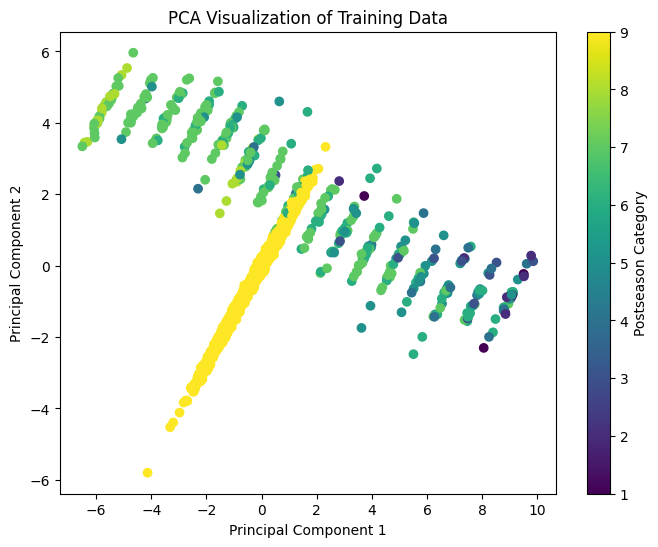


Confusion Matrix:
[[  1   1   1   0   0   0   0   0   0]
 [  0   0   1   1   1   0   0   0   0]
 [  1   0   0   0   1   2   1   0   0]
 [  0   1   1   2   5   2   0   0   0]
 [  0   1   0   5   8   3   5   0   0]
 [  0   0   0   1   6  15  20   1   0]
 [  0   0   1   1   5  10  64   3   2]
 [  0   0   0   0   0   1   6   4   0]
 [  0   0   0   0   0   1   0   0 763]]
Test Accuracy: 0.9040084388185654
Mean Absolute Error: 0.13818565400843882
F1 Score: 0.901896513339724

Confusion Matrix for 2023 Dataset:
[[  0   0   1   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0   0]
 [  0   0   0   0   1   1   0   0   0]
 [  0   0   0   2   2   0   0   0   0]
 [  0   0   0   2   3   2   1   0   0]
 [  0   0   0   1   3   5   7   0   0]
 [  0   0   0   1   1   7  20   2   1]
 [  0   0   0   0   0   1   2   1   0]
 [  0   0   0   0   0   0   0   0 295]]
Accuracy for 2023 Dataset: 0.8980716253443526
Mean Absolute Error for 2023 Dataset: 0.13774104683195593
Mean Absolute Error for Incorrect 

In [1]:
# Neural Network Model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error, f1_score
from sklearn.decomposition import PCA

# Read dataset
df = pd.read_csv('datasets/cbb.csv')

# Map postseason categories to integers
postseason_map = {"Champions": 1, "2ND": 2, "F4": 3, "E8": 4, "S16": 5, "R32": 6, "R64": 7, "R68": 8}
df['POSTSEASON'] = df['POSTSEASON'].map(postseason_map).fillna(9)
df_test = df[df['YEAR'] == 2023]
df = df[df['YEAR'] != 2023]

# Drop non-numeric columns for standardization
non_numeric_cols = ['TEAM', 'CONF']
numeric_df = df.drop(columns=non_numeric_cols)

# Define features and target
X = numeric_df.drop(columns=['YEAR','POSTSEASON'])
y = numeric_df['POSTSEASON']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, stratify=y, random_state=42)

# Standardize features
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to the scaled data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# Visualize data using PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.title('PCA Visualization of Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Postseason Category')
plt.show()

# Define parameter grid for GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(100,), (200,), (300,), (100, 50), (200, 100)],
    'activation': ['logistic', 'tanh', 'relu'],
    'alpha': [0.0001, 0.001, 0.01],
}

# Initialize MLPClassifier
mlp = MLPClassifier(solver='lbfgs', max_iter=1000, random_state=10)

# Perform GridSearchCV
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Evaluate on test set
y_pred = grid_search.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Print confusion matrix and accuracy for the original training and testing
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)
print("Test Accuracy:", accuracy)
print("Mean Absolute Error:", mae)
print("F1 Score:", f1)

# Make predictions on the 2023 data set
df_test = pd.read_csv('datasets/cbb23.csv')
df_test['POSTSEASON'] = df_test['POSTSEASON'].map(postseason_map).fillna(9)

X_23 = df_test.drop(columns=['CONF','TEAM','POSTSEASON'])
y_23 = df_test['POSTSEASON']

X_23_imputed = imputer.transform(X_23)
X_23_scaled = scaler.transform(X_23_imputed)

y_pred_23 = grid_search.predict(X_23_scaled)

# Calculate absolute difference for 2023 dataset
absolute_diff_23 = np.abs(y_23 - y_pred_23)

# Calculate the average absolute difference for 2023 dataset
avg_abs_diff_23 = np.mean(absolute_diff_23)

# Find the indices of incorrect predictions
incorrect_indices_23 = np.where(y_23 != y_pred_23)[0]

# Calculate the average absolute difference for incorrect predictions
avg_abs_diff_incorrect_23 = np.mean(absolute_diff_23[incorrect_indices_23])

# Print confusion matrix and accuracy for 2023 dataset
conf_matrix_23 = confusion_matrix(y_23, y_pred_23)
accuracy_23 = accuracy_score(y_23, y_pred_23)
f1_23 = f1_score(y_23, y_pred_23, average='weighted')
print("\nConfusion Matrix for 2023 Dataset:")
print(conf_matrix_23)
print("Accuracy for 2023 Dataset:", accuracy_23)
print("Mean Absolute Error for 2023 Dataset:", avg_abs_diff_23)
print("Mean Absolute Error for Incorrect Predictions 2023 Dataset:", avg_abs_diff_incorrect_23)
print("F1 Score for 2023 Dataset:", f1_23)

# Write 2023 dataset predictions to file
with open('ann_predicted_results.txt', 'w') as file:
    file.write("Team Name, Predicted Postseason Result, Actual Postseason Result\n")
    for i, team in enumerate(df_test['TEAM']):
       file.write("{}, {}, {}\n".format(team, y_pred_23[i], y_23.values[i]))
